#  Crime in Boston

보스턴은 미국에서 한해에 800명 이상이 총기로 죽는 가장 위험한 도시입니다

어떤 범죄가 발생하는지 어떤 시간이 위험한지 어디가 가장 위험한지를 분석해봅니다
총기 범죄의 비율, 범죄 종류를 확인해봅시다

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('./datasets/crimes-in-boston/crime.csv', encoding='cp949')
df.shape

(319073, 17)

데이터 정제(누락 처리)

In [13]:
# 컬럼을 . 으로 접근하려면 공백이나 특수문자가 없어야 합니다 
df['SHOOTING'].unique() #

array([nan, 'Y'], dtype=object)

In [16]:
df['SHOOTING'] = df['SHOOTING'].fillna('N') 
df['SHOOTING'].unique()

array(['N', 'Y'], dtype=object)

In [20]:
# 누락 확인
df.isna().sum()

INCIDENT_NUMBER        0
OFFENSE_CODE           0
OFFENSE_CODE_GROUP     0
OFFENSE_DESCRIPTION    0
DISTRICT               0
REPORTING_AREA         0
SHOOTING               0
OCCURRED_ON_DATE       0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
UCR_PART               0
STREET                 0
Lat                    0
Long                   0
Location               0
dtype: int64

In [21]:
df = df.dropna() # 누락 행 전부 제거

필요한 컬럼만 선택

In [24]:
df.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [29]:
crime = df[['OFFENSE_CODE_GROUP','SHOOTING','YEAR', 
            'MONTH', 'DAY_OF_WEEK', 'HOUR','STREET']]
#컬럼 이름 변경
crime.columns = ['CODE','SHOOTING','YEAR', 'MONTH', 'WEEK', 'HOUR','STREET']

In [32]:
crime.head(5)

,CODE,SHOOTING,YEAR,MONTH,WEEK,HOUR,STREET
0,Larceny,N,2018,9,Sunday,13,LINCOLN ST
1,Vandalism,N,2018,8,Tuesday,0,HECLA ST
2,Towed,N,2018,9,Monday,19,CAZENOVE ST
3,Investigate Property,N,2018,9,Monday,21,NEWCOMB ST
4,Investigate Property,N,2018,9,Monday,21,DELHI ST


시간 대별 위험정도

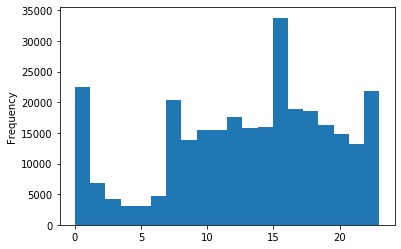

In [48]:
crime.HOUR.plot.hist(bins=20) #오후 3시에 범죄가 가장 많다

자주 발생하는 범죄의 종류

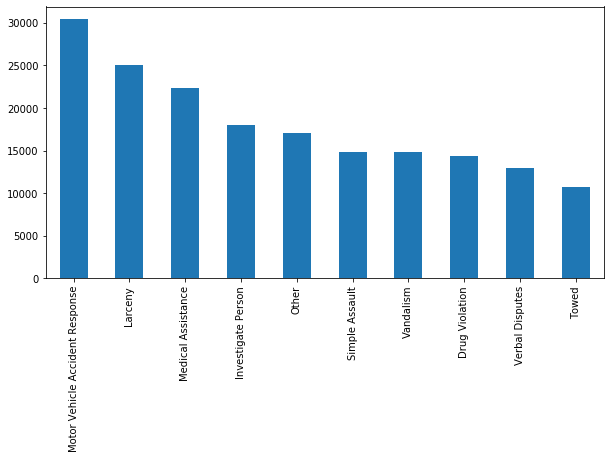

In [46]:
crime.CODE.value_counts().head(10).plot.bar(figsize=(10,5))

In [37]:
crime['CODE'].unique()

array(['Larceny', 'Vandalism', 'Towed', 'Investigate Property',
       'Motor Vehicle Accident Response', 'Auto Theft', 'Verbal Disputes',
       'Robbery', 'Fire Related Reports', 'Other', 'Property Lost',
       'Assembly or Gathering Violations', 'Larceny From Motor Vehicle',
       'Medical Assistance', 'Residential Burglary', 'Simple Assault',
       'Restraining Order Violations', 'Violations', 'Harassment',
       'Ballistics', 'Property Found', 'Police Service Incidents',
       'Disorderly Conduct', 'Property Related Damage',
       'Missing Person Reported', 'Investigate Person', 'Fraud',
       'Drug Violation', 'Aggravated Assault',
       'License Plate Related Incidents', 'Firearm Violations',
       'Other Burglary', 'Arson', 'Warrant Arrests', 'Bomb Hoax',
       'Counterfeiting', 'Liquor Violation', 'Firearm Discovery',
       'Landlord/Tenant Disputes', 'Missing Person Located',
       'Auto Theft Recovery', 'Service', 'Operating Under the Influence',
       'Confiden

 총기 범죄의 비율, 범죄 종류를 확인해봅

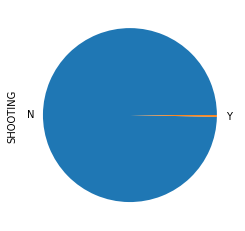

In [52]:
crime.SHOOTING.value_counts().plot.pie()

In [55]:
# 총기로 발생하는 범죄의 종류는 ?  조건부 검색.  데이터[조건]
cond = crime.SHOOTING == 'Y'
crime_shooting = crime[cond]

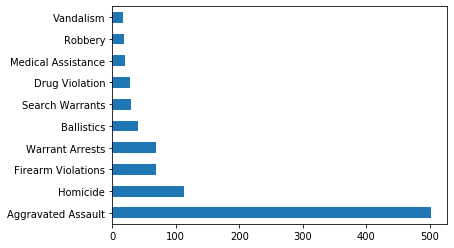

In [60]:
crime_shooting.CODE.value_counts().head(10).plot.barh()

In [62]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,N,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,N,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,N,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,N,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,N,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [68]:
data = df.dropna()

In [69]:
data['Long'].min(), data['Long'].max()

(-71.17867378, -1.0)

In [70]:
data['Lat'].min(), data['Lat'].max()

(-1.0, 42.39504158)

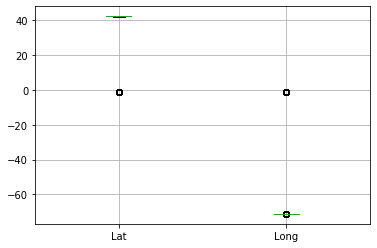

In [72]:
data[['Lat', 'Long']] .boxplot()

In [79]:
# 위도 경도의 절대값이 20이상인 데이터만 선택해서 산점도를 그려보자
cond1 = abs(data['Lat']) > 20
cond2 = abs(data['Long']) > 20
cond = np.logical_and(cond1, cond2)
cond1.mean(), cond2.mean(), cond.mean()

(0.9994874786308936, 0.9994874786308936, 0.9994874786308936)

In [80]:
data_valid = data[cond] 

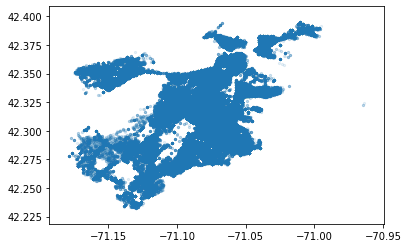

In [92]:
plt.scatter(data_valid['Long'], data_valid['Lat'], s=5, alpha=0.1)

In [109]:
data_valid.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,N,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,43.657791,-72.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,N,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,43.606821,-72.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,N,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,43.646589,-72.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,N,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,43.634182,-72.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,N,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,43.575365,-72.090361,"(42.27536542, -71.09036101)"


In [ ]:
#조건부 검색 
data_valid[data_valid.DAY_OF_WEEK=='Sunday'].head()
#정렬 
data_valid.sort_values(by='DAY_OF_WEEK')

In [116]:
#data_valid.groupby(by='DAY_OF_WEEK').mean()
#data_valid.groupby(by='DAY_OF_WEEK').aggregate(['min','max'])
data_valid.groupby(by=['MONTH','DAY_OF_WEEK']).aggregate(['min','max'])

INCIDENT_NUMBER             OFFENSE_CODE        \
                              min         max          min   max   
MONTH DAY_OF_WEEK                                                  
1     Friday        I110694557-00  I182061525          301  3831   
      Monday        I142033219-00  I182068912          111  3831   
      Saturday      I060168073-00  I182054748          111  3831   
      Sunday        I140110321-00  I182068927          111  3831   
      Thursday      I140160427-01  I182031033          111  3831   
      Tuesday       I130204032-00  I182063905          121  3831   
      Wednesday     I152021532-01  I182043841          111  3831   
2     Friday           I162009638  I182063875          112  3831   
      Monday        I142051855-00  I182060656          301  3831   
      Saturday         I162009885  I182067430          111  3831   
      Sunday           I162010118  I182063256          111  3831   
      Thursday      I142042232-00  I182068987          111  3831   
      Tuesday       I130194606-00  I182045852          301  3831   
      Wednesday        I152048466  I182064543          111  3831   
3     Friday           I152066989  I182067498          111  3831   
      Monday        I140311903-00  I182048143          111  3831   
      Saturday         I152086867  I182067825          111  3831   
      Sunday        I152010121-00  I182065461          111  3831   
      Thursday         I152098924  I182063310          301  3831   
      Tuesday          I152104363  I182051680          111  3831   
      Wednesday     I152019928-00  I182066843          301  3831   
4     Friday           I162005874  I182068727          111  3831   
      Monday           I152069051  I182065457          301  3831   
      Saturday      I142050207-00  I182059950          111  3831   
      Sunday        I140188130-00  I182067892          111  3831   
      Thursday         I162026740  I182065089          111  3831   
      Tuesday       I140041532-00  I182064452          111  3831   
      Wednesday     I120283195-00  I182060533          301  3831   
5     Friday           I162031565  I182064913          111  3831   
      Monday           I162024859  I182065104          301  3831   
...                           ...         ...          ...   ...   
8     Tuesday       I142014620-00  I182070943          111  3831   
      Wednesday     I080542626-00  I182070857          111  3831   
9     Friday        I120470733-00  I182068383          111  3831   
      Monday        I120260724-01  I182070941          301  3831   
      Saturday         I152073709  I182070887          111  3831   
      Sunday           I152073928  I182070945          111  3831   
      Thursday      I142013220-00  I182055984          111  3831   
      Tuesday          I152052905  I182060757          111  3831   
      Wednesday     I152006153-00  I182013548          111  3831   
10    Friday        I110177502-00  I182043779          121  3831   
      Monday        I120069826-00  I182064766          301  3831   
      Saturday      I142016089-00  I182056896          111  3831   
      Sunday           I152078936  I182054767          111  3831   
      Thursday         I152081507  I182047902          111  3831   
      Tuesday       I152033383-00  I182036908          111  3831   
      Wednesday     I142020701-00  I182070115          111  3831   
11    Friday        I090317057-00  I182068812          111  3831   
      Monday           I152058857  I182041289          111  3831   
      Saturday      I130452692-00  I182012435          111  3831   
      Sunday           I152080455  I182023441          111  3831   
      Thursday      I152024515-00  I182045998          111  3831   
      Tuesday          I152072372  I182057388          111  3831   
      Wednesday     I142045856-00  I182070304          301  3831   
12    Friday        I142033071-00  I182069334          111  3831   
      Monday        I130041200-00  I182044061          111  3831   
      